# 特征集处理

**学习目标**：创建一个包含极少特征但效果与更复杂的特征集一样出色的集合
 

## 设置

In [34]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [35]:
def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income"]]
    processed_features = selected_features.copy()
    processed_features["rooms_per_person"] = (
        california_housing_dataframe["total_rooms"] /
        california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
    output_targets["median_house_value"] = (
    california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [36]:
# 训练集
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# 验证集
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2636.5,537.6,1425.8,499.8,3.9,2.0
std,2.1,2.0,12.5,2186.3,421.3,1144.1,384.5,1.9,1.1
min,32.5,-124.3,1.0,2.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1454.0,296.0,786.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2113.0,430.0,1162.0,407.0,3.5,1.9
75%,37.7,-118.0,37.0,3146.0,648.0,1717.2,604.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.6,2660.8,543.7,1438.5,504.7,3.9,2.0
std,2.1,2.0,12.7,2164.9,422.0,1156.8,384.6,1.9,1.2
min,32.5,-124.3,1.0,18.0,3.0,8.0,4.0,0.5,0.1
25%,33.9,-121.8,18.0,1471.0,298.0,794.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2161.0,443.0,1177.0,416.0,3.6,1.9
75%,37.7,-118.0,37.0,3166.2,650.2,1733.0,607.0,4.7,2.3
max,41.9,-114.6,52.0,32627.0,6445.0,28566.0,6082.0,15.0,52.0


Training targets summary:


,median_house_value
count,12000.0
mean,205.9
std,115.7
min,15.0
25%,118.3
50%,179.1
75%,263.1
max,500.0


Validation targets summary:


,median_house_value
count,5000.0
mean,210.7
std,116.5
min,15.0
25%,123.8
50%,182.9
75%,269.9
max,500.0


## 构建良好的特征集

**如果只使用 2 个或 3 个特征，您可以获得的最佳效果是什么？**

**相关矩阵**展现了两两比较的相关性，既包括每个特征与目标特征之间的比较，也包括每个特征与其他特征之间的比较。

在这里，相关性被定义为[皮尔逊相关系数](https://baike.baidu.com/item/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0/12712835)。
相关性值具有以下含义：

  * `-1.0`：完全负相关
  * `0.0`：不相关
  * `1.0`：完全正相关

In [37]:
correlation_dataframe = training_examples.copy()
correlation_dataframe['target'] = training_targets['median_house_value']

correlation_dataframe.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,target
latitude,1.0,-0.9,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.1
longitude,-0.9,1.0,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.1,-0.0
housing_median_age,0.0,-0.1,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,-0.1,0.1
total_rooms,-0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.1,0.0
population,-0.1,0.1,-0.3,0.9,0.9,1.0,0.9,0.0,-0.1,-0.0
households,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,0.0,-0.0,0.1
median_income,-0.1,-0.0,-0.1,0.2,-0.0,0.0,0.0,1.0,0.2,0.7
rooms_per_person,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.0,0.2,1.0,0.2
target,-0.1,-0.0,0.1,0.1,0.0,-0.0,0.1,0.7,0.2,1.0


理想情况下，我们希望具有与目标密切相关的特征。

此外，我们还希望有一些相互之间的相关性不太密切的特征，以便它们添加独立信息。

利用这些信息来尝试移除特征。

为方便起见，我们已经添加了前一个练习的训练代码。

In [38]:
def construct_feature_columns(input_features):
    
    return set([tf.feature_column.numeric_column(my_feature) 
                for my_feature in input_features])

In [39]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key, value in dict(features).items()}
    
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(10000)
        
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [40]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    
    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer
    )

    # 1. Create input functions.
    training_input_fn = lambda: my_input_fn(
        training_examples, 
        training_targets["median_house_value"], 
        batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(
        training_examples, 
        training_targets["median_house_value"], 
        num_epochs=1, 
        shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(
        validation_examples,
        validation_targets["median_house_value"], 
        num_epochs=1, 
        shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        # 2. Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 225.01
  period 01 : 213.92
  period 02 : 202.98
  period 03 : 192.10
  period 04 : 181.40
  period 05 : 170.85
  period 06 : 160.60
  period 07 : 150.61
  period 08 : 140.87
  period 09 : 131.48
Model training finished.


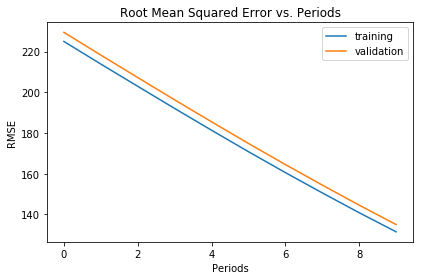

In [44]:
minimal_features = ['rooms_per_person', 'median_income']

assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

Training model...
RMSE (on training data):
  period 00 : 164.43
  period 01 : 122.66
  period 02 : 118.23
  period 03 : 116.98
  period 04 : 115.35
  period 05 : 115.28
  period 06 : 114.27
  period 07 : 113.87
  period 08 : 113.27
  period 09 : 112.57
Model training finished.


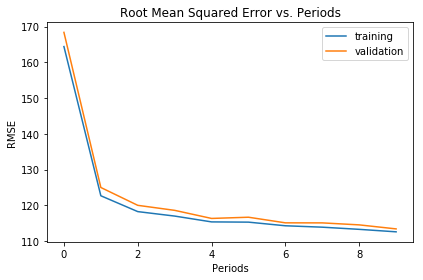

In [43]:
%matplotlib inline
minimal_features = [
    'median_income',
    'latitude'
]

assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

## 更好地利用纬度

绘制 latitude 与 median_house_value 的图形

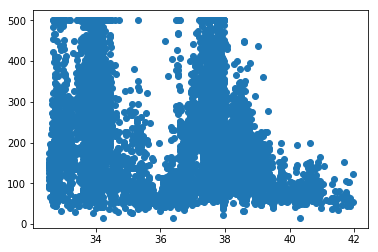

In [46]:
plt.scatter(training_examples['latitude'], training_targets['median_house_value'])

二者不存在线性关系。

**尝试创建一些能够更好地利用纬度的合成特征**

例如，可以创建某个特征，将 latitude 映射到值 |latitude - 38|，并将该特征命名为 distance_from_san_francisco。

或者，可以将该空间分成 10 个不同的分桶（例如 latitude_32_to_33、latitude_33_to_34 等）：如果 latitude 位于相应分桶范围内，则显示值 1.0；如果不在范围内，则显示值 0.0。

使用相关矩阵来构建合成特征；如果发现效果还不错的合成特征，可以将其添加到模型中。

In [61]:
def select_and_transform_features(source_df):
    LATITUDE_RANGES = zip(range(32, 44), range(33, 45))
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_df["median_income"]
    for r in LATITUDE_RANGES:
        selected_examples["latitude_%d_to_%d" % r] = source_df["latitude"].apply(
            lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
    return selected_examples

selected_training_examples = select_and_transform_features(training_examples)
selected_validation_examples = select_and_transform_features(validation_examples)

Training model...
RMSE (on training data):
  period 00 : 225.95
  period 01 : 215.78
  period 02 : 205.69
  period 03 : 195.70
  period 04 : 185.84
  period 05 : 176.09
  period 06 : 166.51
  period 07 : 157.13
  period 08 : 147.97
  period 09 : 139.08
Model training finished.


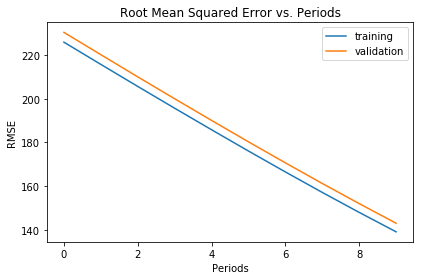

In [63]:
_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)